In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-credit-card-approvals/metadata.txt
/kaggle/input/predicting-credit-card-approvals/cc_approvals.data


In [46]:
dataset=pd.read_csv("/kaggle/input/predicting-credit-card-approvals/cc_approvals.data",header=None)

In [47]:
list=['A'+str(i+1) for i in range(len(dataset.columns)) ]
dataset.columns = list

In [48]:
# 1 for + and 0 for -
dataset['A16'] = dataset['A16'].apply(lambda x: 1 if x=='+' else 0)
dataset

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,0


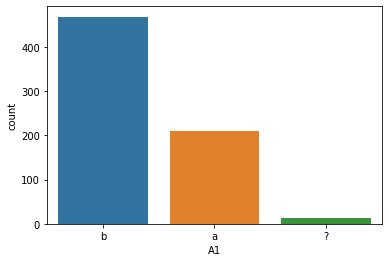

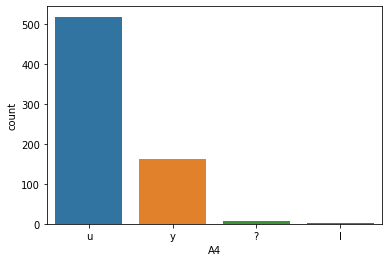

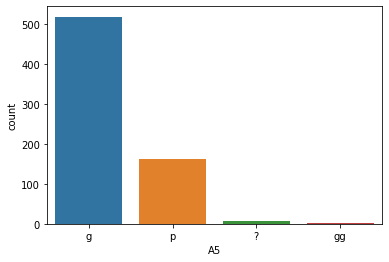

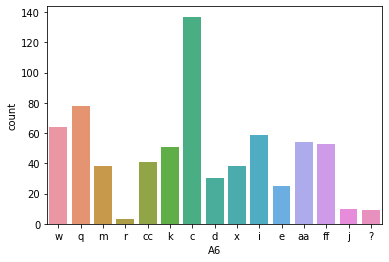

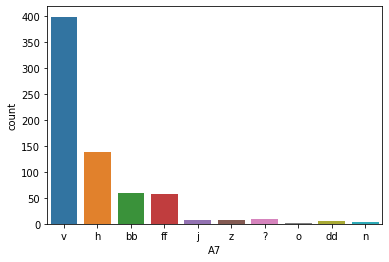

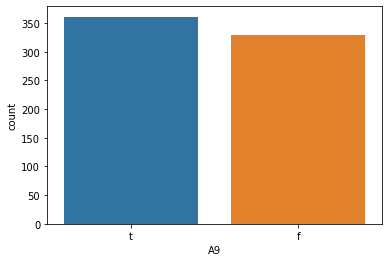

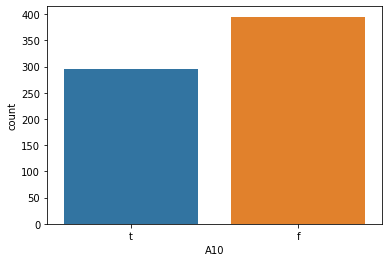

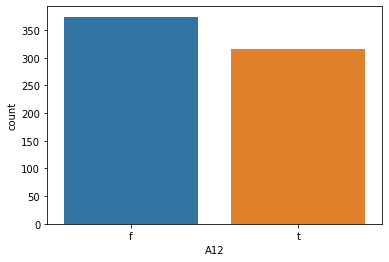

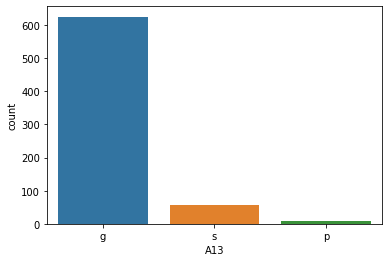

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
for da in ['A1','A4','A5','A6','A7','A9','A10','A12','A13']:
    sns.countplot(x=da,data=dataset)
    plt.show()

### A1,A2,A14,A4,A5,A6,A7 ARE HAVING '?'  

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 86.4+ KB


In [51]:
# for feature in ['A2','A14']:
#     data=dataset.copy()
#     data.groupby(feature)['A16'].plot.bar()
#     plt.xlabel(feature)
#     plt.ylabel('A16')
#     plt.title(feature)
#     plt.sh
dataset.A2.value_counts().sort_values(ascending=False)

?        12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
31.33     1
42.25     1
48.33     1
46.08     1
36.42     1
Name: A2, Length: 350, dtype: int64

In [52]:
dataset.A14.value_counts().sort_values(ascending=False)

00000    132
00200     35
00120     35
00160     34
00100     30
        ... 
00680      1
00163      1
00062      1
00208      1
00256      1
Name: A14, Length: 171, dtype: int64

#### for A2 and A14 datatype shouled be float but it is showing  obj because these numerical column has ? whereas rest numerical column dosen't have  

In [53]:
for columns in dataset.columns:
    dataset[columns] = dataset[columns].apply(lambda x: np.nan if x=='?' else x)

In [54]:
# we ned to convert A2 from object to float64 and A14 from object to int64
dataset['A2'] = dataset['A2'].astype('float64')
dataset['A14']= dataset['A14'].astype('float64')


In [55]:
#missing values in all columns
for columns in dataset.columns:
    print(columns,'has',dataset[columns].isnull().sum(),'missing values')

A1 has 12 missing values
A2 has 12 missing values
A3 has 0 missing values
A4 has 6 missing values
A5 has 6 missing values
A6 has 9 missing values
A7 has 9 missing values
A8 has 0 missing values
A9 has 0 missing values
A10 has 0 missing values
A11 has 0 missing values
A12 has 0 missing values
A13 has 0 missing values
A14 has 13 missing values
A15 has 0 missing values
A16 has 0 missing values


## handling categorical 

In [56]:
def impute_nan(data,variable):
    most_freq=data[variable].value_counts().index[0]
    data[variable].fillna(most_freq,inplace=True)

In [57]:
for var in ['A1','A4','A5','A6','A7']:
    impute_nan(dataset,var)

In [58]:
#missing values in all columns
for columns in dataset.columns:
    print(columns,'has',dataset[columns].isnull().sum(),'missing values')
    

A1 has 0 missing values
A2 has 12 missing values
A3 has 0 missing values
A4 has 0 missing values
A5 has 0 missing values
A6 has 0 missing values
A7 has 0 missing values
A8 has 0 missing values
A9 has 0 missing values
A10 has 0 missing values
A11 has 0 missing values
A12 has 0 missing values
A13 has 0 missing values
A14 has 13 missing values
A15 has 0 missing values
A16 has 0 missing values


#### hanling numerical 

In [59]:
 def impute_nan_random(df,variable,extreme):
#         df[variable+'_random']= df[variable]
#         random_sample= df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
#         random_sample_index= df[df[variable].isnull()].index
#         df.loc[df[variable].isnull(),varia_ble+'random']= random_sample
        df[variable+'_end']=df[variable].fillna(extreme)  
# def impute_nan(df,variable,extreme):
#     df[variable+'_end']=df[variable].fillna(extreme)
# #      df[variable].fillna(extreme)
    

In [60]:
# for i in ['A2','A14']:
extreme= dataset['A2'].mean()+3*dataset['A2'].std()
impute_nan_random(dataset,'A2',extreme)
extreme= dataset['A14'].mean()+3*dataset['A14'].std()
impute_nan_random(dataset,'A14',extreme)
    
# impute_nan_random(dataset,'A14')

In [61]:
dataset

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A2_end,A14_end
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1,30.83,202.0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1,58.67,43.0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1,24.50,280.0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1,27.83,100.0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1,20.17,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0,21.08,260.0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0,22.67,200.0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0,25.25,200.0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0,17.92,280.0


In [62]:
#missing values in all columns
for columns in dataset.columns:
    print(columns,'has',dataset[columns].isnull().sum(),'missing values')

A1 has 0 missing values
A2 has 12 missing values
A3 has 0 missing values
A4 has 0 missing values
A5 has 0 missing values
A6 has 0 missing values
A7 has 0 missing values
A8 has 0 missing values
A9 has 0 missing values
A10 has 0 missing values
A11 has 0 missing values
A12 has 0 missing values
A13 has 0 missing values
A14 has 13 missing values
A15 has 0 missing values
A16 has 0 missing values
A2_end has 0 missing values
A14_end has 0 missing values


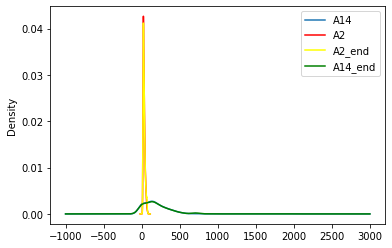

In [63]:
# for i in ['A2','A14']:
fig = plt.figure()
ax = fig.add_subplot(111)
dataset['A14'].plot(kind='kde', ax=ax)
dataset['A2'].plot(kind='kde', ax=ax,color='red')
dataset['A2_end'].plot(kind='kde', ax=ax,color= 'yellow')
# dataset.A14_end.plot(kind='kde', ax=ax, color='red')
dataset.A14_end.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


In [64]:
dataset.drop(['A2','A14'],axis =1,inplace =True)


In [65]:
dataset.rename(columns ={'A2_end':'A2'},inplace =True)

In [66]:
dataset.rename(columns={'A14_end':'A14'},inplace =True)

In [67]:
dataset

,A1,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A15,A16,A2,A14
0,b,0.000,u,g,w,v,1.25,t,t,1,f,g,0,1,30.83,202.0
1,a,4.460,u,g,q,h,3.04,t,t,6,f,g,560,1,58.67,43.0
2,a,0.500,u,g,q,h,1.50,t,f,0,f,g,824,1,24.50,280.0
3,b,1.540,u,g,w,v,3.75,t,t,5,t,g,3,1,27.83,100.0
4,b,5.625,u,g,w,v,1.71,t,f,0,f,s,0,1,20.17,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,10.085,y,p,e,h,1.25,f,f,0,f,g,0,0,21.08,260.0
686,a,0.750,u,g,c,v,2.00,f,t,2,t,g,394,0,22.67,200.0
687,a,13.500,y,p,ff,ff,2.00,f,t,1,t,g,1,0,25.25,200.0
688,b,0.205,u,g,aa,v,0.04,f,f,0,f,g,750,0,17.92,280.0


In [68]:
#missing values in all columns
for columns in dataset.columns:
    print(columns,'has',dataset[columns].isnull().sum(),'missing values')

A1 has 0 missing values
A3 has 0 missing values
A4 has 0 missing values
A5 has 0 missing values
A6 has 0 missing values
A7 has 0 missing values
A8 has 0 missing values
A9 has 0 missing values
A10 has 0 missing values
A11 has 0 missing values
A12 has 0 missing values
A13 has 0 missing values
A15 has 0 missing values
A16 has 0 missing values
A2 has 0 missing values
A14 has 0 missing values


### ome hot encoding

In [69]:
pd.pandas.set_option('display.max_columns',None)
for da in ['A1','A4','A5','A6','A7','A9','A10','A12','A13']:
    var = pd.get_dummies(dataset[da],drop_first=True)
    dataset= pd.concat([dataset,var],axis =1)
    

In [70]:
dataset.drop(['A1','A4','A5','A6','A7','A9','A10','A12','A13'],axis =1,inplace=True)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# dataset.drop(['A16'],axis =1)

x_train,x_test,y_train,y_test=train_test_split(dataset.drop(['A16'],axis =1),dataset['A16'],test_size=0.3,random_state=101)

#### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(x_train,y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [74]:
prediction= logmodel.predict(x_test)


In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy= confusion_matrix(y_test,prediction)
accuracy

array([[102,  16],
       [ 17,  72]])

In [76]:
ac =accuracy_score(y_test,prediction)
ac*100

84.05797101449275

#### Decision Tree


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [78]:
dtree= DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
y_pred= dtree.predict(x_test)

In [80]:
accuracy_score(y_test,y_pred)*100

79.22705314009661

####  random forest 

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
y_pre= rf.predict(x_test)


In [83]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate, thresholds =roc_curve(y_test,y_pre)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc*100

85.22662350028565

###  KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier
c_fier=  KNeighborsClassifier(n_neighbors=3)
c_fier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
y_pred= c_fier.predict(x_test)

In [86]:
accuracy_score(y_test,y_pred)*100

68.11594202898551

In [87]:
error_rate= []

for  i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train,y_train)
    pred_i= knn.predict(x_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    
    

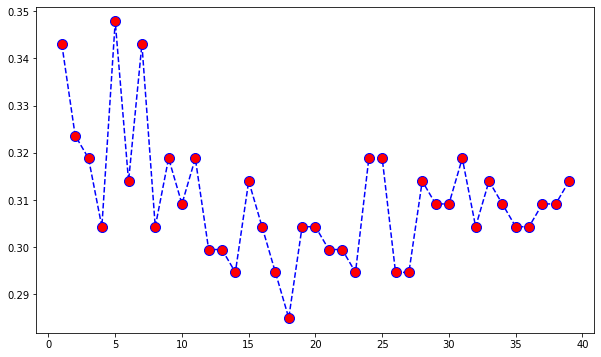

In [88]:
plt.figure(figsize =(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--', markersize=10,markerfacecolor='red',marker='o')
